
<h1 align='center' style='margin-bottom: 0px'>HPC Assignment 3</h1>
<h4 align='center' style='margin-top: 0px'> Alejandra T. Manotas</h4>


<h3 aling='left' style='margin-top: 0px'> 1. Python Performance</h4> 

Here I compared three different ways to made a $\textbf{for loop}$. The first one is the normal loop, the second one is the loop with a function called $\textbf{map(function,iterations)}$, and the last one is the loop in $\textbf{the comprehension form}$.

In [1]:
import numpy as np
import time as t

In [2]:
list1={1,2,3,4,5,6,7,8,9}

In [3]:
list2=[]
tp1=0.0
tp1=t.time()
for x in list1:
    if(x%2==0):
        list2.append(x)
    else:
        list2.append(x**2)
tp1=t.time()-tp1
print (tp1)
print (list2)


0.0002541542053222656
[1, 2, 9, 4, 25, 6, 49, 8, 81]


In [4]:
list3=[]
tp2=0.0
tp2=t.time()
list3=map(x if x%2==0 else x**2,list1)
tp2=t.time()-tp2
print (tp2)
print (list3)

8.606910705566406e-05


In [5]:
list4=[]
tp3=0.0
tp3=t.time()
list4=[x if x%2==0 else x**2 for x in list1]
tp3=t.time()-tp3
print (tp3)
print (list4)

0.00018453598022460938
[1, 2, 9, 4, 25, 6, 49, 8, 81]


In this part I had to compare the speed of make all loops outside of a function, and inside of it.

In [6]:
#time starts
tp3=0.
tp3=t.time()
#definition of the matrix global variable
global matriz
matriz=np.zeros((5,5))
l=matriz.shape 
#definition of the function
def changeval(i, j):
    matriz[i][j]=i*np.sqrt(j)
#loop outside the function
for i in range(0,l[0]-1):
    for j in range(0,l[0]-1):
        changeval(i,j)  #call function
#time ends       
tp3=t.time()-tp3
#Print results
print (tp3)
print (matriz)

0.0007770061492919922
[[0.         0.         0.         0.         0.        ]
 [0.         1.         1.41421356 1.73205081 0.        ]
 [0.         2.         2.82842712 3.46410162 0.        ]
 [0.         3.         4.24264069 5.19615242 0.        ]
 [0.         0.         0.         0.         0.        ]]


In [41]:
#time starts
tp4=0.
tp4=t.time()
#definition of the matrix global variable
global matriz
matriz=np.zeros((5,5))
l=matriz.shape
#definition of the function with thw loop inside
def changeval(a, b):
    for i in range(0,a):
        for j in range(0,b):
            matriz[i][j]=i*np.sqrt(j)
#call function            
changeval(l[0]-1,l[0]-1)
#time ends
tp4=t.time()-tp4
#Print results
print (tp4)
print (matriz)

0.0004203319549560547
[[0.         0.         0.         0.         0.        ]
 [0.         1.         1.41421356 1.73205081 0.        ]
 [0.         2.         2.82842712 3.46410162 0.        ]
 [0.         3.         4.24264069 5.19615242 0.        ]
 [0.         0.         0.         0.         0.        ]]


The last part of the point was the time comparition between the running a C++ code and a Python code.

In [10]:
x=0.0
n=50000000 #Here the iteration are less than the C++ code

tp5=0.0
tp5=t.time()
for i in range(1,n):#Sum of the n firts numbers
    x=x+i
tp5=t.time()-tp5

tp6=0.0
tp6=t.time()
for i in range(1,n):#Product of the n firts numbers
    x=x*i
tp6=t.time()-tp6
print ("Time of sum: ", tp5)
print ("Time of product: ",tp6)

9.588984251022339
Time of sum:  9.588984251022339
Time of product:  9.31203317642212


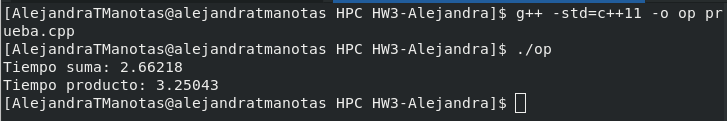

In [11]:
from IPython.display import Image
Image(filename='Punto1.png')

The picture is the run time of the same sume and product code of Python on C++ language. 

<h3 aling='left' style='margin-top: 0px'> 2. Python Decorators</h4> 

In [9]:
import matplotlib.pyplot as plt

In [2]:
def fib(i):
    if i < 2:
        return 1 
    else:
        return fib(i-1) + fib(i-2)
values=[20,25,30,35]

In [3]:
%timeit pass
fib(values[0])

13.2 ns ± 0.215 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


10946

In [4]:
%timeit pass
fib(values[1])

15.4 ns ± 0.115 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


121393

In [5]:
%timeit pass
fib(values[2])

13.2 ns ± 0.0495 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


1346269

In [6]:
%timeit pass
fib(values[3])

14 ns ± 0.636 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


14930352

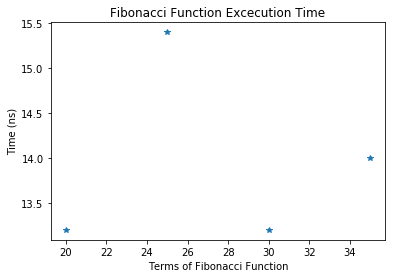

In [16]:
tiempos=[13.2,15.4,13.2,14]
plt.plot(values,tiempos,'*')
plt.xlabel("Terms of Fibonacci Function")
plt.ylabel("Time (ns)")
plt.title("Fibonacci Function Excecution Time")
plt.show()

In [18]:
from functools import wraps

def cache(f):
    cache = { }
    @wraps(f)
    def wrap(*arg):
        if arg not in cache: cache[arg] = f(*arg)
        return cache[arg]
    return wrap

@cache
def fib(i):
    if i < 2:
        return 1 
    else:
        return fib(i-1) + fib(i-2)

%timeit pass

13.1 ns ± 0.112 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


The next plot was a fail attempt to show the mistake in the time calculation.

TypeError: can only concatenate list (not "float") to list

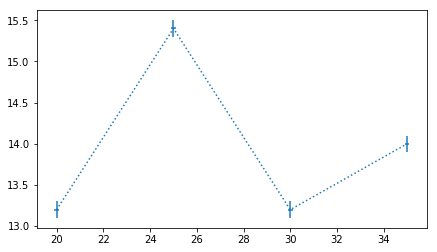

In [26]:
# example data
xerr = 0.1
yerr = 0.1

# lower & upper limits of the error
lolims = np.array([0.215, 0.115, 0.0495, 0.636], dtype=bool)
uplims = np.array([0.215, 0.115, 0.0495, 0.636], dtype=bool)
ls = 'dotted'

fig, ax = plt.subplots(figsize=(7, 4))

# standard error bars
ax.errorbar(values, tiempos, xerr=xerr, yerr=yerr, linestyle=ls)


# do the plotting
ax.errorbar(values, tiempos + 2.1, xerr=xerr, yerr=yerr,
            uplims=uplims, lolims=lolims,
            marker='o', markersize=8)

# tidy up the figure
ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()